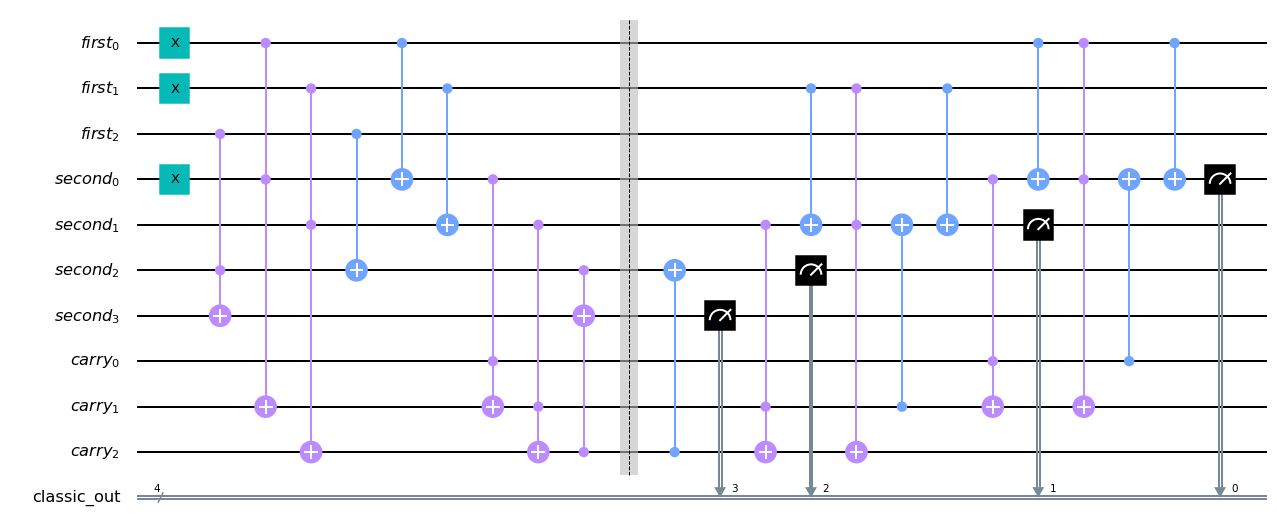

In [1]:
from qiskit import  Aer, ClassicalRegister, QuantumRegister, QuantumCircuit, execute
# import basic plot tools
from qiskit.visualization import plot_histogram

#Initializing the registers; two quantum registers with n bits each
#1 more with n+1 bits, which will also hold the sum of the two #numbers
#The classical register has n+1 bits, which is used to make the sum #readable

first = "011"
second = "001"

l_first = len(first)
l_second = len(second)


if l_first > l_second:
     n = l_second
else:
     n = l_second

a = QuantumRegister(n, name="first") #First number
b = QuantumRegister(n+1, name="second") #Second number, then sum
c = QuantumRegister(n, name="carry") #Carry bits
cl = ClassicalRegister(n+1, name="classic_out") #Classical output
#Combining all of them into one quantum circuit
qc = QuantumCircuit(a, b, c, cl)


for i in range(l_first):
    if first[i] == "1":
       qc.x(a[l_first - (i+1)]) #Flip the qubit from 0 to 1
for i in range(l_second):
   if second[i] == "1":
      qc.x(b[l_second - (i+1)]) #Flip the qubit from 0 to 1

for i in range(n-1):
    qc.ccx(a[i], b[i], c[i+1])
    qc.cx(a[i], b[i])
    qc.ccx(c[i], b[i], c[i+1])

qc.ccx(a[n-1], b[n-1], b[n])
qc.cx(a[n-1], b[n-1])
qc.ccx(c[n-1], b[n-1], b[n])

qc.barrier()

#Reversing the gate operation performed on b[n-1]
qc.cx(c[n-1], b[n-1])
#Reversing the gate operations performed during the carry gate implementations
#This is done to ensure the sum gates are fed with the correct input bit states
for i in range(n-1):
    qc.ccx(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])
    qc.ccx(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    #These two operations act as a sum gate; if a control bit is at                
    #the 1> state then the target bit b[(n-2)-i] is flipped
    qc.cx(c[(n-2)-i], b[(n-2)-i])
    qc.cx(a[(n-2)-i], b[(n-2)-i])

#qc.barrier()

#Measure qubits and store results in classical register cl
for i in range(n+1):
    qc.measure(b[i], cl[i])

qc.draw()

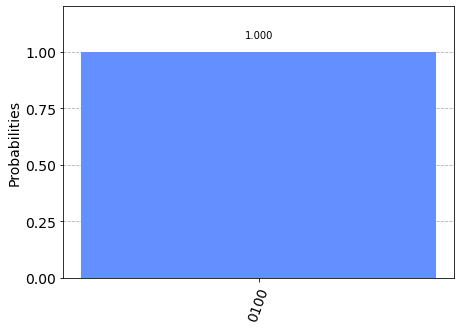

In [2]:
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)